# Exemplos de transformações de imagens utilizando a técnica *Data Augmentation* no Keras

Você pode aprender mais sobre a [API do gerador de dados de imagem Keras](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) na [documentação do Keras](http://keras.io/preprocessing/image/).

## Imagem amostra

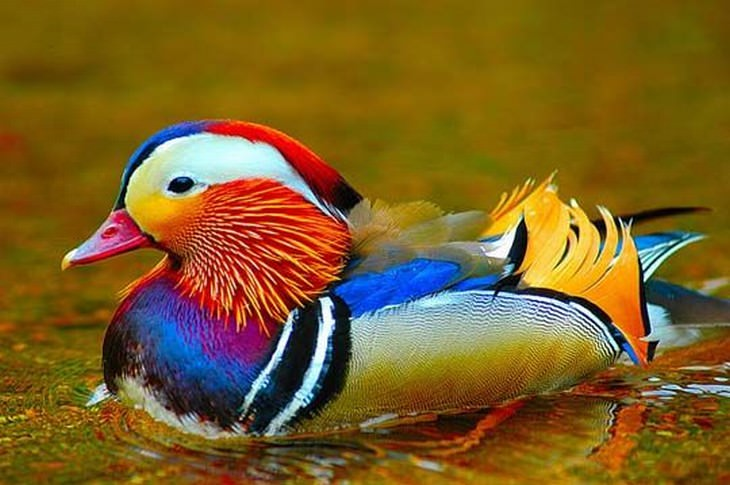

In [1]:
from IPython.display import Image
Image(filename = 'pato.jpg')

## Deslocamento horizontal 

Uma mudança para uma imagem significa mover todos os pixels da imagem em uma direção, como horizontal ou verticalmente, enquanto mantém as mesmas dimensões da imagem.

Isso significa que alguns dos pixels serão cortados da imagem e haverá uma região da imagem onde novos valores de pixel terão que ser especificados.

Os width_shift_range e height_shift_range argumentos para a ImageDataGenerator construtor controlar a quantidade de deslocamento horizontal e vertical, respectivamente.

Esses argumentos podem especificar um valor de ponto flutuante que indica a porcentagem (entre 0 e 1) da largura ou altura da imagem a ser deslocada. Como alternativa, vários pixels podem ser especificados para deslocar a imagem.

Especificamente, um valor no intervalo entre nenhum deslocamento e a porcentagem ou valor de pixel será amostrado para cada imagem e o deslocamento realizado, por exemplo, [0, valor]. Como alternativa, você pode especificar uma tupla ou matriz do intervalo mínimo e máximo do qual o deslocamento será amostrado; por exemplo: [-100, 100] ou [-0,5, 0,5].

O exemplo abaixo demonstra um deslocamento horizontal com o argumento width_shift_range entre [-200,200] pixels e gera um gráfico de imagens geradas para demonstrar o efeito.

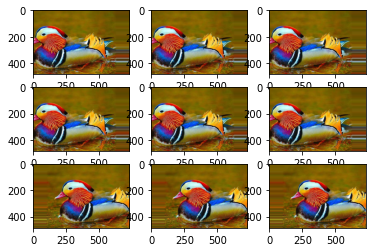

In [2]:
# exemplo de deslocamento horizontal
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# carrega a imagem
img = load_img('pato.jpg')
# converte para array numpy
data = img_to_array(img)
# expande a dimensão para uma amostra
samples = np.expand_dims(data, 0)
# cria o gerador de (aumento) de imagens
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# prepara iterador
it = datagen.flow(samples, batch_size=1)
# obtém amostras e plota
for i in range(9):
	# define subplot
	pyplot.subplot(3,3,i+1)
	# gera batch de imagens
	batch = it.next()
	# converte para inteiros sem sinal para visualizar
	image = batch[0].astype('uint8')
	# plota pixels (dados) da imagem
	pyplot.imshow(image)
# mostra a figura
pyplot.show()

A execução do exemplo acima cria a instância de ImageDataGenerator configurada para aumento de imagem e, em seguida, cria o iterador. O iterador é então chamado nove vezes em um loop e cada imagem aumentada é plotada.

Podemos ver no gráfico do resultado que uma gama de diferentes deslocamentos horizontais positivos e negativos selecionados aleatoriamente foi realizada e os valores de pixel na borda da imagem são duplicados para preencher a parte vazia da imagem criada pelo deslocamento.

## Deslocamento vertical

Abaixo está o mesmo exemplo atualizado para realizar deslocamentos verticais da imagem por meio do argumento height_shift_range, neste caso especificando a porcentagem da imagem a ser deslocada como 0,5 da altura da imagem.

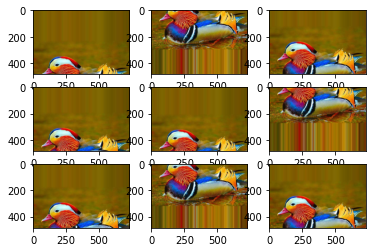

In [3]:
# exemplo de deslocamento vertical
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# carrega a imagem
img = load_img('pato.jpg')
# converte para array numpy
data = img_to_array(img)
# expande a dimensão para uma amostra
samples = np.expand_dims(data, 0)
# cria o gerador de (aumento) de imagens
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepara iterador
it = datagen.flow(samples, batch_size=1)
# obtém amostras e plota
for i in range(9):
	# define subplot
	pyplot.subplot(3,3,i+1)
	# gera batch de imagens
	batch = it.next()
	# converte para inteiros sem sinal para visualizar
	image = batch[0].astype('uint8')
	# plota pixels (dados) da imagem
	pyplot.imshow(image)
# mostra a figura
pyplot.show()

Executar o exemplo cria um gráfico de imagens aumentadas com deslocamentos verticais positivos e negativos aleatórios.

Podemos ver que os deslocamentos horizontais e verticais positivos e negativos provavelmente fazem sentido para a fotografia escolhida, mas em alguns casos, os pixels replicados na borda da imagem podem não fazer sentido para um modelo.

Observe que outros modos de preenchimento podem ser especificados por meio do argumento “ fill_mode ”.

## Rotação (giro) Horizontal e Vertical 

Uma inversão de imagem significa inverter as linhas ou colunas de pixels no caso de uma inversão vertical ou horizontal, respectivamente.

O aumento da inversão é especificado por um argumento booleano horizontal_flip ou vertical_flip para o construtor de classe ImageDataGenerator. Para fotografias como a fotografia do avião usada aqui, viradas horizontais e verticais podem até fazer sentido, mas em outras aplicações (situações) nem sempre isso deve ser feito.

O exemplo abaixo demonstra como aumentar a fotografia escolhida com inversões horizontais por meio do argumento horizontal_flip .

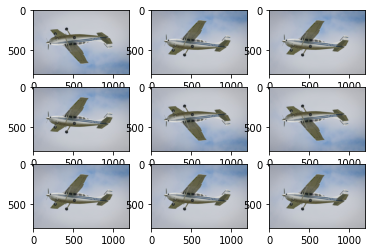

In [4]:
# exemplo de rotação horizontal/vertical
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# carrega a imagem
img = load_img('plane.jpg')
# converte para array numpy
data = img_to_array(img)
# expande a dimensão para uma amostra
samples = np.expand_dims(data, 0)
# cria o gerador de (aumento) de imagens
#datagen = ImageDataGenerator(horizontal_flip=True)
datagen = ImageDataGenerator(vertical_flip=True)
# prepara iterador
it = datagen.flow(samples, batch_size=1)
# obtém amostras e plota
for i in range(9):
	# define subplot
	pyplot.subplot(3,3,i+1)
	# gera batch de imagens
	batch = it.next()
	# converte para inteiros sem sinal para visualizar
	image = batch[0].astype('uint8')
	# plota pixels (dados) da imagem
	pyplot.imshow(image)
# mostra a figura
pyplot.show()

Podemos ver que a inversão horizontal(vertical) é aplicada aleatoriamente a algumas imagens e não a outras.

## Rotação (giro) Aleatório

Um aumento de rotação gira aleatoriamente a imagem no sentido horário por um determinado número de graus de 0 a 360.

A rotação provavelmente girará os pixels para fora do quadro da imagem e deixará áreas do quadro sem dados de pixel que devam ser preenchidos.

O exemplo abaixo demonstra rotações aleatórias por meio do argumento **rotation_range**, com rotações para a imagem entre 0 e 90 graus.

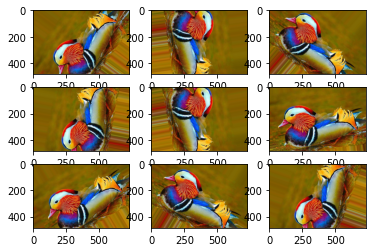

In [5]:
# exemplo de rotação aleatória
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# carrega a imagem
img = load_img('pato.jpg')
# converte para array numpy
data = img_to_array(img)
# expande a dimensão para uma amostra
samples = np.expand_dims(data, 0)
# cria o gerador de (aumento) de imagens
datagen = ImageDataGenerator(rotation_range=90)
# prepara iterador
it = datagen.flow(samples, batch_size=1)
# obtém amostras e plota
for i in range(9):
	# define subplot
	pyplot.subplot(3,3,i+1)
	# gera batch de imagens
	batch = it.next()
	# converte para inteiros sem sinal para visualizar
	image = batch[0].astype('uint8')
	# plota pixels (dados) da imagem
	pyplot.imshow(image)
# mostra a figura
pyplot.show()

Gera exemplos da imagem girada, mostrando, em alguns casos, pixels girados para fora do quadro e o preenchimento do vizinho mais próximo.

## Aumento de brilho aleatório

O brilho da imagem pode ser aumentado por imagens escurecendo aleatoriamente, imagens iluminadas ou ambos.

A intenção é permitir que um modelo generalize as imagens treinadas em diferentes níveis de iluminação.

Isto pode ser conseguido através da especificação do **brightness_range** argumento para o ImageDataGenerator () construtor que especifica min e gama max como um flutuador que representa uma percentagem por seleção de um valor de brilho.

Valores menores que 1,0 escurecem a imagem, por exemplo, [0,5, 1,0], enquanto valores maiores que 1,0 clareiam a imagem, por exemplo, [1,0, 1,5], onde 1,0 não tem efeito no brilho.

O exemplo abaixo demonstra um aumento de brilho da imagem, permitindo que o gerador escurece aleatoriamente a imagem entre 1,0 (sem alteração) e 0,2 ou 20%.

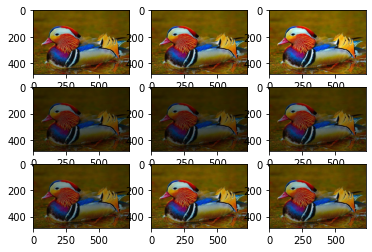

In [6]:
# exemplo de brilho aleatório
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# carrega a imagem
img = load_img('pato.jpg')
# converte para array numpy
data = img_to_array(img)
# expande a dimensão para uma amostra
samples = np.expand_dims(data, 0)
# cria o gerador de (aumento) de imagens
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepara iterador
it = datagen.flow(samples, batch_size=1)
# obtém amostras e plota
for i in range(9):
	# define subplot
	pyplot.subplot(3,3,i+1)
	# gera batch de imagens
	batch = it.next()
	# converte para inteiros sem sinal para visualizar
	image = batch[0].astype('uint8')
	# plota pixels (dados) da imagem
	pyplot.imshow(image)
# mostra a figura
pyplot.show()

## Aumento de zoom aleatório

Um aumento de zoom amplia aleatoriamente a imagem e adiciona novos valores de pixel ao redor da imagem ou interpola valores de pixel respectivamente.

O zoom da imagem pode ser configurado pelo argumento **zoom_range** para o construtor ImageDataGenerator . Você pode especificar a porcentagem do zoom como um único float ou um intervalo como uma matriz ou tupla.

Se um float for especificado, o intervalo do zoom será [1-valor, 1 + valor]. Por exemplo, se você especificar 0,3, o intervalo será [0,7, 1,3], ou entre 70% (zoom in) e 130% (zoom out).

A quantidade de zoom é amostrada de maneira uniforme e aleatória da região de zoom para cada dimensão (largura, altura) separadamente.

O zoom pode não parecer intuitivo. Observe que valores de zoom menores que 1,0 aumentam o zoom da imagem, por exemplo, [0,5,0,5] torna o objeto na imagem 50% maior ou mais próximo, e valores maiores que 1,0 aumentam o zoom da imagem em 50%, por exemplo, [1,5, 1,5 ] torna o objeto na imagem menor ou mais distante. Um zoom de [1.0,1.0] não tem efeito.

A execução do exemplo gera exemplos da imagem ampliada, mostrando um zoom aleatório que é diferente nas dimensões de largura e altura que também altera aleatoriamente a proporção do objeto na imagem.

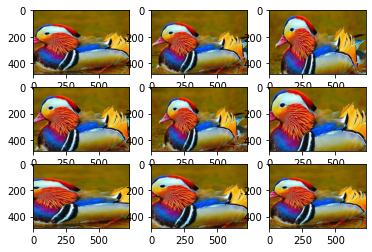

In [7]:
# exemplo de geração de zoom
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# carrega a imagem
img = load_img('pato.jpg')
# converte para array numpy
data = img_to_array(img)
# expande a dimensão para uma amostra
samples = np.expand_dims(data, 0)
# cria o gerador de (aumento) de imagens
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepara iterador
it = datagen.flow(samples, batch_size=1)
# obtém amostras e plota
for i in range(9):
	# define subplot
	pyplot.subplot(3,3,i+1)
	# gera batch de imagens
	batch = it.next()
	# converte para inteiros sem sinal para visualizar
	image = batch[0].astype('uint8')
	# plota pixels (dados) da imagem
	pyplot.imshow(image)
# mostra a figura
pyplot.show()

## Salvando aumento de imagens em arquivos

A preparação e o aumento dos dados são realizados na hora certa por Keras.

Isso é eficiente em termos de memória, mas você pode exigir as imagens exatas usadas durante o treinamento. Por exemplo, talvez você queira usá-los com um pacote de software diferente mais tarde ou apenas gerá-los uma vez e usá-los em vários modelos ou configurações de aprendizado profundo diferentes.

Keras permite que você salve as imagens geradas durante o treinamento. O diretório, o prefixo do nome do arquivo e o tipo de arquivo de imagem podem ser especificados para a função flow () antes do treinamento. Em seguida, durante o treinamento, as imagens geradas serão gravadas em arquivo.

O exemplo abaixo demonstra isso e grava 16 imagens em um subdiretório “images” com o prefixo “aug” e o tipo de arquivo JPG.

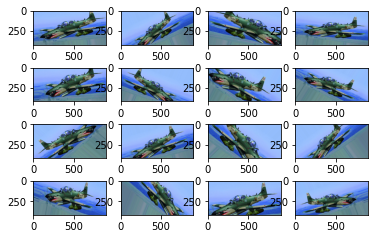

In [8]:
# exemplo de aumento de imagens salvando em arquivos
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
# carrega a imagem
img = load_img('supertucano.jpg')
# converte para array numpy
data = img_to_array(img)
# expande a dimensão para uma amostra
sample = np.expand_dims(data, 0)
# cria folder para armazenar as imagens geradas
os.makedirs('output')
# cria o gerador de (aumento) de imagens
datagen = ImageDataGenerator(rotation_range=45, width_shift_range=0.1,
                            height_shift_range=0.1, zoom_range=0.25,
                            fill_mode='nearest', horizontal_flip=True)
# prepara iterador
it = datagen.flow(sample, save_to_dir='output',
                     save_format='jpg', save_prefix='aug_')
# obtém amostras e plota
for i in range(16):
	# define subplot
	pyplot.subplot(4,4,i+1)
	# gera batch de imagens
	batch = it.next()
	# converte para inteiros sem sinal para visualizar
	image = batch[0].astype('uint8')
	# plota pixels (dados) da imagem
	pyplot.imshow(image)
# mostra a figura
pyplot.show()

Confira na pasta 'output' as imagens geradas.

## Referências

- [Documentação do Keras](http://keras.io/preprocessing/image/)
- [Classe ImageDataGenerator](https://keras.io/preprocessing/image/)
- [Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
